# Housing Price Prediction

## 1. Data Loading and Exploration

This cell imports the necessary libraries for data manipulation, visualization, and numerical operations:
- `pandas` for data handling.
- `matplotlib.pyplot` for basic plotting.
- `seaborn` for enhanced visualizations.
- `numpy` for numerical operations.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

This cell loads the housing dataset from a CSV file named 'housing.csv' into a pandas DataFrame called `df`.

In [ ]:
df = pd.read_csv('/content/housing.csv')

This cell displays the entire DataFrame `df`. This is useful for inspecting the data structure and content.

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


This cell provides a concise summary of the DataFrame `df`, including the data types of each column, the number of non-null values, and memory usage. This helps in understanding the data's structure and identifying missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This cell calculates the number of missing values (NaN) in each column of the DataFrame `df`. This is important for identifying columns that require handling of missing data.

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


This cell generates descriptive statistics for the numerical columns in the DataFrame `df`. It provides insights into the central tendency, dispersion, and shape of the data's distribution.

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2. Data Preprocessing

This cell removes rows with missing values from the DataFrame `df`. This is a common step in data preprocessing to handle missing data.

In [ ]:
df =  df.dropna()

This cell verifies that all missing values have been removed by checking the sum of null values in each column after applying the `dropna()` method.

In [ ]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


This cell splits the data into features (`X`) and the target variable (`y`). The target variable is 'median_house_value', which is removed from the features DataFrame.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

This cell splits the features and target variable into training and testing sets using `train_test_split`. 20% of the data is allocated to the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

This cell defines two custom transformer classes for data preprocessing:
- `NumericPreprocessor`: Handles outlier clipping and skew transformation for numerical features.
- `FeatureEngineering`: Creates new features ('rooms_per_house', 'bedrooms_ratio', 'people_per_house') from existing ones.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class NumericPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, skew_threshold=0.5, outlier_iqr_multiplier=1.5):
        self.skew_threshold = skew_threshold
        self.outlier_iqr_multiplier = outlier_iqr_multiplier

    def fit(self, X, y=None):
        self.lower_bounds_ = {}
        self.upper_bounds_ = {}

        for col in X.select_dtypes(include=[np.number]).columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bounds_[col] = Q1 - self.outlier_iqr_multiplier * IQR
            self.upper_bounds_[col] = Q3 + self.outlier_iqr_multiplier * IQR

        return self

    def transform(self, X):
        X = X.copy()
        numeric_cols = X.select_dtypes(include=[np.number]).columns

        # Outlier clipping
        for col in numeric_cols:
            lower = self.lower_bounds_[col]
            upper = self.upper_bounds_[col]
            X[col] = np.where(X[col] < lower, lower, X[col])
            X[col] = np.where(X[col] > upper, upper, X[col])

        # Skew transform
        for col in numeric_cols:
            skewness = X[col].skew()
            if abs(skewness) > self.skew_threshold:
                if (X[col] <= 0).any():
                    X[col] = np.log1p(X[col] - X[col].min() + 1)
                else:
                    X[col] = np.log1p(X[col])

        return X


class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X["rooms_per_house"] = X["total_rooms"] / X["households"]
        X["bedrooms_ratio"] = X["total_bedrooms"] / X["total_rooms"]
        X["people_per_house"] = X["population"] / X["households"]
        return X

## 3. Exploratory Data Analysis (EDA)

This cell generates a heatmap to visualize the correlation between the numerical features in the training set (`X_train`). This helps in identifying highly correlated features.

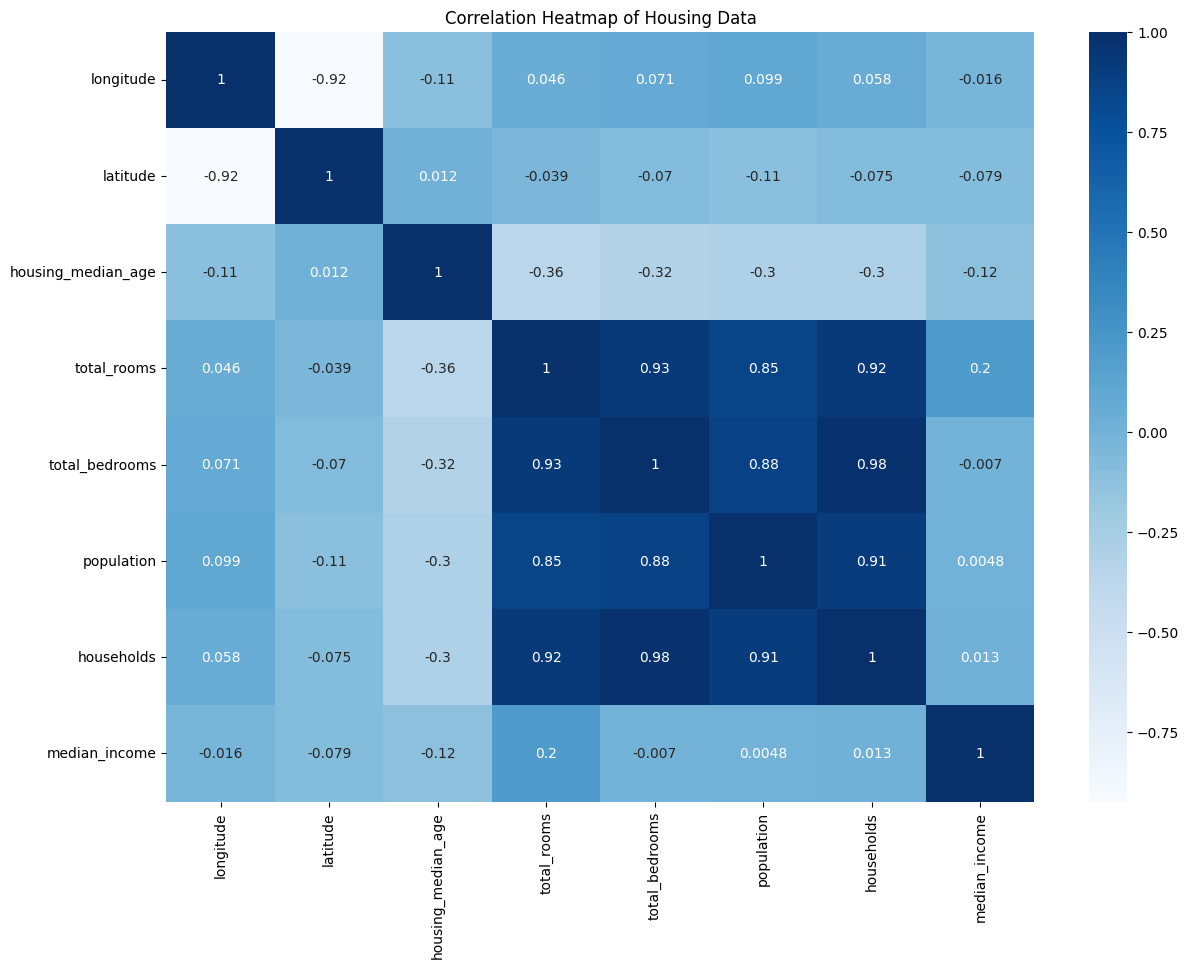

In [ ]:
plt.figure(figsize=(14,10))
sns.heatmap(X_train.select_dtypes(include=[np.number]).corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

This cell creates a scatter plot to visualize the relationship between 'median_house_value' and 'longitude', with points colored by 'median_house_value'. This helps in understanding how house prices vary with longitude.

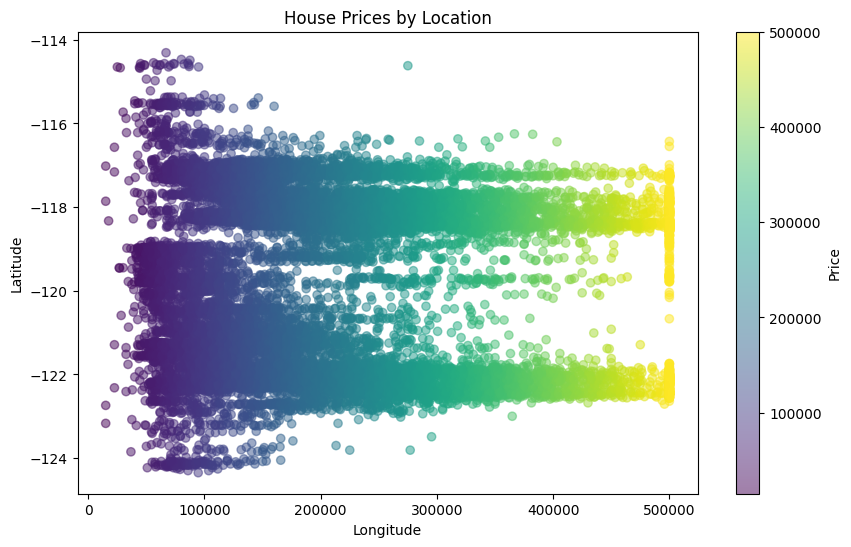

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['median_house_value'], df['longitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

This cell creates a scatter plot to visualize the relationship between 'median_house_value' and 'latitude', with points colored by 'median_house_value'. This helps in understanding how house prices vary with latitude.

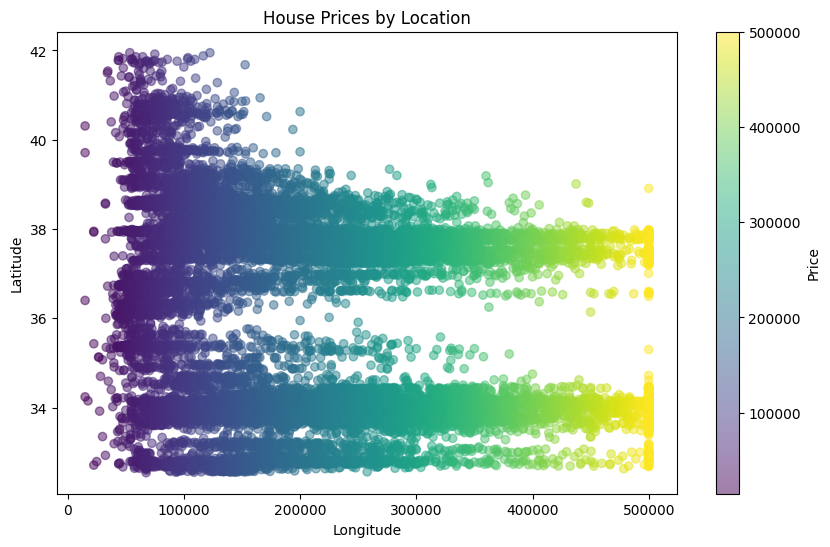

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['median_house_value'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

This cell creates a scatter plot to visualize the geographical distribution of house prices, with points representing locations based on 'longitude' and 'latitude', and colored by 'median_house_value'. This provides a spatial view of house prices.

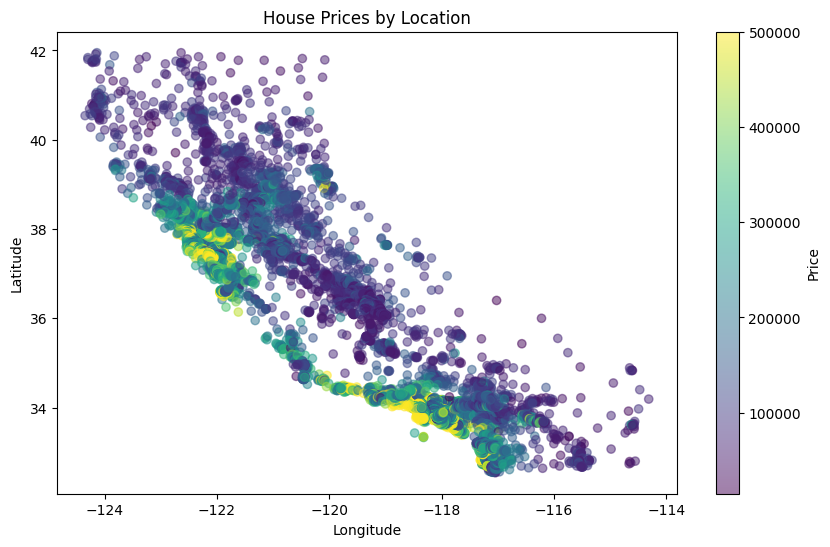

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House Prices by Location')
plt.show()

This cell uses Plotly Express to create a bar chart showing the average 'median_house_value' for each 'ocean_proximity' category. This helps in comparing house prices based on their proximity to the ocean.

In [ ]:
import plotly.express as px
avg_prices = df.groupby('ocean_proximity', as_index=False)['median_house_value'].mean()

fig = px.bar(
    avg_prices,
    x='ocean_proximity',
    y='median_house_value',
    color='ocean_proximity',
    text='median_house_value'
)
fig.show()

## 4. Model Training and Evaluation

This cell sets up and trains a machine learning pipeline for the housing price prediction.
The pipeline includes:
1.  `FeatureEngineering`: Creates new features.
2.  `ColumnTransformer`:
    - Applies `NumericPreprocessor` and `StandardScaler` to numerical features.
    - Applies `OneHotEncoder` to categorical features.
3.  `LinearRegression`: The model used for prediction.
After fitting the pipeline on the training data, it makes predictions on the test data and prints regression metrics (MSE, RMSE, MAE, R2) to evaluate the model's performance.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd


numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply feature engineering before defining the preprocessor
feature_engineer = FeatureEngineering()
X_train_engineered = feature_engineer.fit_transform(X_train)
X_test_engineered = feature_engineer.transform(X_test)

# Update numeric_features to include the new features
numeric_features_engineered = X_train_engineered.select_dtypes(include=[np.number]).columns.tolist()


preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([('num_proc', NumericPreprocessor(skew_threshold=0.5, outlier_iqr_multiplier=1.5)), ('scaler', StandardScaler())]), numeric_features_engineered),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Örnek pipeline
pipe = Pipeline([
    ('preprocess',preprocessor),
    ('model', LinearRegression()),
])
# X_train ve y_train DataFrame/Series olarak hazır
pipe.fit(X_train_engineered, y_train)
# Test verisi üzerinde tahmin
y_pred = pipe.predict(X_test_engineered)



def print_regression_metrics(y_true, y_pred):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred)**0.5:.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"R2: {r2_score(y_true, y_pred):.4f}")
# Kullanımı
print_regression_metrics(y_test, y_pred)

MSE: 4851821339.7051
RMSE: 69655.0166
MAE: 50890.2955
R2: 0.6393


This cell processes the test set (`X_test`) using the trained pipeline's preprocessor. It then creates a pandas DataFrame from the processed test data, assigning appropriate column names including the original numerical features, the new engineered features, and the one-hot encoded categorical features. Finally, it displays the head of the processed test DataFrame.

In [ ]:
X_train_processed = pipe.named_steps['preprocess'].transform(X_train_engineered)
X_test_processed = pipe.named_steps['preprocess'].transform(X_test_engineered)


ohe = preprocessor.named_transformers_['cat']
cat_features = ohe.get_feature_names_out(categorical_features)

# Update num_features to include features created by FeatureEngineering
num_features_engineered = X_train_engineered.select_dtypes(include=np.number).columns.tolist()

all_features = np.concatenate([num_features_engineered, cat_features])


X_test_processed = pd.DataFrame(
    X_test_processed,
    columns=all_features
)

X_test_processed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,people_per_house,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.595113,-0.721033,-0.366418,1.459435,1.497589,1.481765,1.486488,0.025033,-1.336367,1.675126,-2.704564,1.0,0.0,0.0,0.0,0.0
1,0.550172,-0.669559,-0.683569,0.948751,1.462578,1.152851,1.368279,-0.432257,-1.098575,1.584890,-0.575983,1.0,0.0,0.0,0.0,0.0
2,0.694981,-0.716353,-1.714309,0.325639,0.730532,0.139790,0.571823,0.714485,-0.736798,1.242733,-1.205210,1.0,0.0,0.0,0.0,0.0
3,-0.927881,0.982288,0.902185,-0.218016,-0.088149,0.249132,-0.000392,-0.363659,-0.700915,0.355744,0.746874,0.0,1.0,0.0,0.0,0.0
4,-0.418552,-0.356035,0.267883,-0.006444,-0.391063,-0.342156,-0.465211,0.850565,1.443858,-1.071069,0.345105,1.0,0.0,0.0,0.0,0.0
